# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania z wielu miejsc początkowych 1 pkt


In [30]:
from typing import Callable, Tuple
# matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

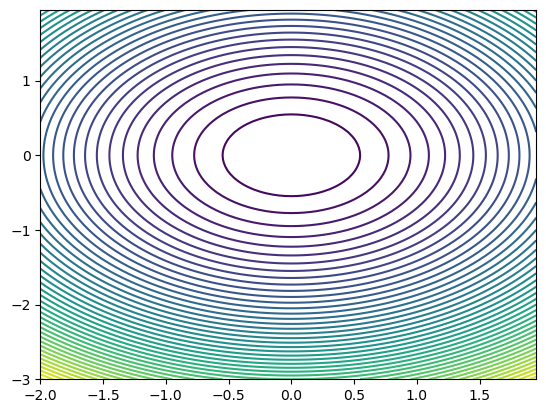

In [31]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

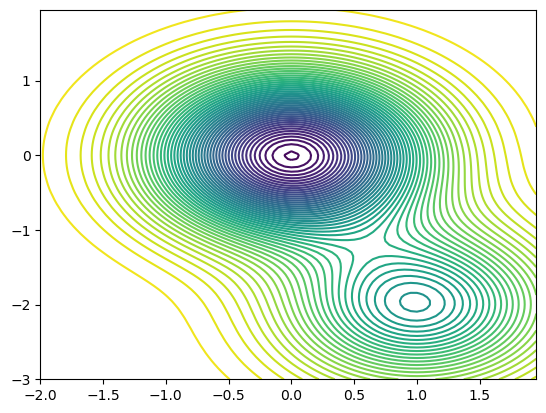

In [32]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [33]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace)>0:
            plt.scatter(self.trace[:,0], self.trace[:,1], s=10)
            plt.plot(self.trace[:,0], self.trace[:,1])

    def calculate_func_vale(self, x1:float, x2:float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        # new_x1, new_x2 = x1 - self.alpha * self.calculate_func_grad(x1, x2)[0], x2 - self.alpha * self.calculate_func_grad(x1, x2)[1]
        return x1 - self.alpha * self.calculate_func_grad(x1, x2)[0], x2 - self.alpha * self.calculate_func_grad(x1, x2)[1]


    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:int=0, plot:bool=False)->float:
        current_pos= self.gradient_descent_step(x1_init, x2_init)
        self.trace = []
        for i in range(steps):
            current_pos = self.gradient_descent_step(current_pos[0], current_pos[1])
            grad = self.calculate_func_grad(current_pos[0], current_pos[1])
            self.trace.append(current_pos)
            if math.sqrt(grad[0]**2 + grad[1]**2) < 0.01:
                print("skończone")
                break
            if verbose > 0:
                info = f"Iteration:{i+1}; Point: {current_pos[0]}, {current_pos[1]}"
                val = f"Value: {self.calculate_func_vale(current_pos[0],current_pos[1])}"
            if verbose == 1:
                if i % 5 == 0:
                    print(info)
            if verbose == 2:
                print(info)
                print(val)
            if verbose == 3:
                print(info)
                print(val)
                print(f"Gradient: {grad[0]}, {grad[1]}")
 
        if plot:
            self.trace = np.array(self.trace)
            self.plot_func()

# Funkcja 1

In [34]:
def function1(x1, x2):
    return x1**2 + x2**2

def grad_function1(x1, x2):
    return (2*x1, 2*x2)

# Funkcja 2

In [35]:
def function2(x1, x2):
    return 1.5-np.exp(-x1**(2)-x2**(2))-0.5*np.exp(-(x1-1)**(2)-(x2+2)**(2))

def grad_function2(x1, x2):
    return (2*x1*np.exp(-x1**(2)-x2**(2))+(x1-1)*np.exp(-(x1-1)**(2)-(x2+2)**(2)), 2*x2*np.exp(-x1**(2)-x2**(2))+(x2+2)*np.exp(-(x1-1)**(2)-(x2+2)**(2)))

Iteration:1; Point: 1.42259533591742, -1.9984199131632652
Value: 1.0793394771253761
Gradient: 0.36041004930111553, -0.00841403840677813
Iteration:2; Point: 1.3865543309873083, -1.9975785093225873
Value: 1.0666962288103463
Gradient: 0.34039981987229545, -0.008719360113766636
Iteration:3; Point: 1.3525143490000788, -1.9967065733112106
Value: 1.0554533992754873
Gradient: 0.31937632203266075, -0.008988258568449661
Iteration:4; Point: 1.3205767167968128, -1.9958077474543656
Value: 1.045584154539598
Gradient: 0.2978628292394264, -0.00921504731646285
Iteration:5; Point: 1.2907904338728702, -1.9948862427227194
Value: 1.037020695644178
Gradient: 0.27632517672010426, -0.009395414715292294
Iteration:6; Point: 1.2631579162008597, -1.9939467012511902
Value: 1.0296661984806188
Gradient: 0.2551544909254911, -0.009526587319785404
Iteration:7; Point: 1.2376424671083106, -1.9929940425192116
Value: 1.0234063022068751
Gradient: 0.2346604758798879, -0.00960735278775179
Iteration:8; Point: 1.214176419520321

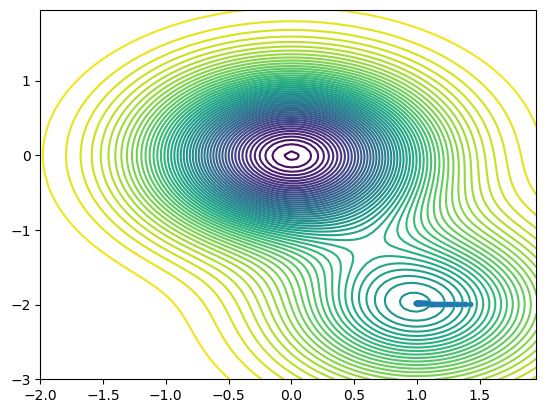

In [39]:
test = SimpleGradientDescent(function1, grad_function1)
test.minimize(1, 1, 10, 0, True)
test2 = SimpleGradientDescent(function2, grad_function2)
test2.minimize(1, 1, 30, 0, True)
test3 = SimpleGradientDescent(function2, grad_function2)
test3.minimize(1.5, -2, 50, 3, True)